Loading components...


/var/folders/2f/nxrbr3pn1msgrl4ffyj33zd00000gn/T/ipykernel_7425/3191603228.py:21: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  Y = torch.load(base_path + 'Y_tensor.pt')
/va

Loaded all components successfully!


/Users/sarahurbut/aladynoulli/pyScripts/cluster_g.py:25: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.G = torch.tensor(G, dtype=torch.float32)
/Users/sarahurbut/aladynoulli/pyScripts/cluster_g.py:26: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.Y = torch.tensor(Y, dtype=torch.float32)


Lambda kernel condition number: 56314924.00
Phi kernel condition number: 59684776.00

Cluster Sizes:
Cluster 0: 5 diseases
Cluster 1: 8 diseases
Cluster 2: 31 diseases
Cluster 3: 14 diseases
Cluster 4: 26 diseases
Cluster 5: 29 diseases
Cluster 6: 13 diseases
Cluster 7: 16 diseases
Cluster 8: 87 diseases
Cluster 9: 11 diseases
Cluster 10: 27 diseases
Cluster 11: 8 diseases
Cluster 12: 5 diseases
Cluster 13: 9 diseases
Cluster 14: 10 diseases
Cluster 15: 12 diseases
Cluster 16: 16 diseases
Cluster 17: 14 diseases
Cluster 18: 7 diseases
Initialization complete!

Cluster Assignments:

Cluster 0:
  - Septal Deviations/Turbinate Hypertrophy (prevalence: 0.0003)
  - Nasal polyps (prevalence: 0.0002)
  - Chronic pharyngitis and nasopharyngitis (prevalence: 0.0001)
  - Chronic sinusitis (prevalence: 0.0002)
  - Other upper respiratory disease (prevalence: 0.0003)

Cluster 1:
  - Cancer of bronchus; lung (prevalence: 0.0003)
  - Malignant neoplasm, other (prevalence: 0.0002)
  - Secondary malig

/Users/sarahurbut/aladynoulli/pyScripts/cluster_g.py:611: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout()


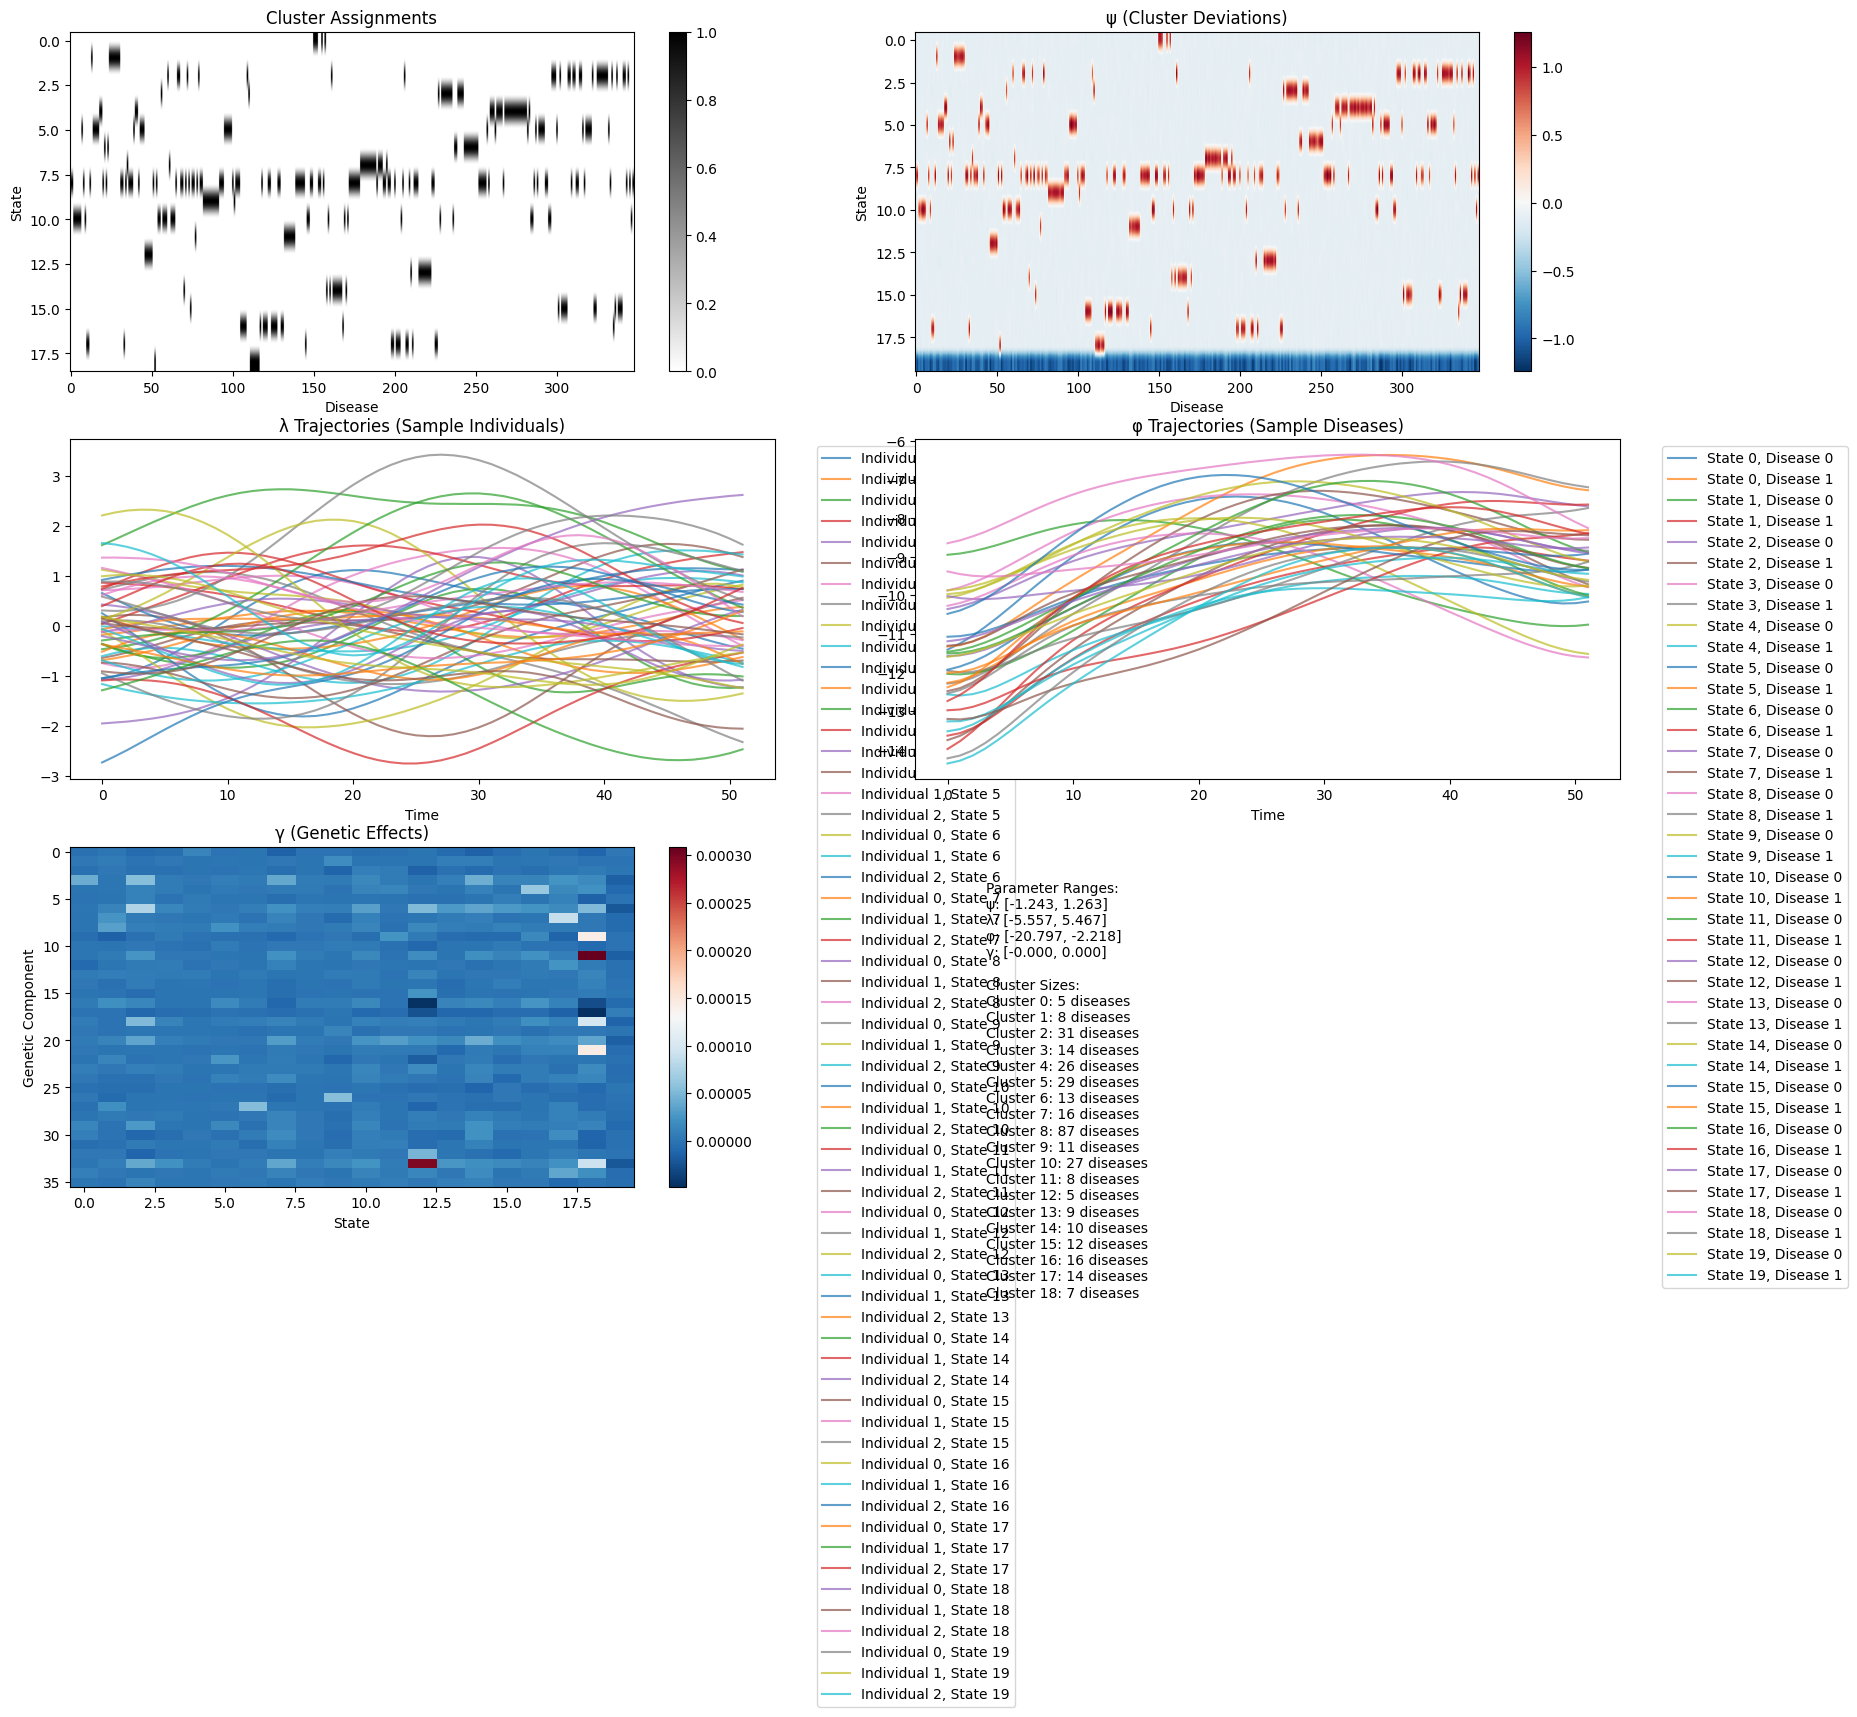

In [1]:
from cluster_g import *
%load_ext autoreload
%autoreload 2
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from scipy.spatial.distance import pdist, squareform
from scipy.special import expit
from scipy.stats import multivariate_normal
import matplotlib.pyplot as plt
from sklearn.cluster import SpectralClustering  # Add this import

def load_model_essentials(base_path='/Users/sarahurbut/Dropbox (Personal)/'):
    """
    Load all essential components
    """
    print("Loading components...")
    
    # Load large matrices
    Y = torch.load(base_path + 'Y_tensor.pt')
    E = torch.load(base_path + 'E_matrix.pt')
    G = torch.load(base_path + 'G_matrix.pt')
    
    # Load other components
    essentials = torch.load(base_path + 'model_essentials.pt')
    
    print("Loaded all components successfully!")
    
    return Y, E, G, essentials

# Load and initialize model:
Y, E, G, essentials = load_model_essentials()
model = AladynSurvivalFixedKernelsAvgLoss_clust(
N=Y.shape[0],
D=Y.shape[1],
T=Y.shape[2],
K=essentials['K'],
P=essentials['P'],
G=G,
Y=Y,
prevalence_t=essentials['prevalence_t']
)
# Visualize the clusters
disease_names_list=essentials['disease_names']
model.visualize_clusters(disease_names_list)
model.visualize_initialization()

In [ ]:
initial_psi = model.psi.detach().clone()

# Run for just 10 epochs to check behavior
E_tensor = torch.tensor(E, dtype=torch.long)
history = model.fit(E_tensor, num_epochs=1000, learning_rate=1e-4, lambda_reg=1e-2)

# Compare final vs initial psi
print("\nOverall psi changes:")